In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("data/complete_raw.csv", index_col=0)

In [3]:
df.head()

,Organization,Capital Program,Program Subclass,Project Status,Project Title,Project Planning From,Project Planning To,Planned Construction From,Planned Construction To,Construction Completion From,...,start,end,duration,prior,prior_requests,during_requests,prior_collisions,during_collisions,prior_traffic,during_traffic
0,Transportation Services,Active Transportation,Sidewalk Rehabilitation,Project Complete,Stephen St Sidewalk Rehabilitation,2019-01-01,2019-12-31,2019-01-01,2019-12-31,2019-01-01,...,2019-01-01,2019-12-31,364 days 00:00:00.000000000,2018-01-01,0,1230,612,0,5185.737705,5951.972222
1,City Engineering,Road Rehabilitation,Local Repair / Preventative Maintenance,Project Complete,Mowat Ave Road Repair,2019-01-01,2019-12-31,2019-01-01,2019-12-31,2019-01-01,...,2019-01-01,2019-12-31,364 days 00:00:00.000000000,2018-01-01,0,577,340,0,7113.609756,8996.000000
2,Utilities Kingston,Utilities Construction,Electrical,Project Complete,Electric - Pole Line Design - Bagot Street,2016-01-01,2016-12-31,2017-01-01,2017-12-31,NaN,...,2017-01-01,2017-12-31,364 days 00:00:00.000000000,2016-01-01,0,0,461,422,5992.635294,6012.847561
3,Utilities Kingston,Utilities Construction,Electrical,Project Complete,Electric - 5kV 204 Circuit Line Extension,NaN,NaN,2015-01-01,2015-12-31,2015-01-01,...,2015-01-01,2015-12-31,364 days 00:00:00.000000000,2014-01-01,0,0,0,0,6430.750000,7986.677083
4,Utilities Kingston,Utilties Rehabilitation,Water,Project Complete,2018 Watermain Relining Project,2017-01-01,2017-12-31,2018-01-01,2018-12-31,NaN,...,2018-01-01,2018-12-31,364 days 00:00:00.000000000,2017-01-01,0,0,289,310,10790.975610,8705.764706


In [4]:
'''
TODO main: define label - disruptive {0, 1}
    TODO: Mulitply service requests by 4 for all records that have a prior year is in 2019. (since it starts oct 2019)
    TODO: Only use collisions during the years 2016-2018. Constructions in 2016 do not have prior info on collisions.
    TODO: Find a way to combine the last six columns into one score
    TODO: Find percent change of [collisions, requests, traffic] for those that have a value.
'''

'\nTODO main: define label - disruptive {0, 1}\n    TODO: Mulitply service requests by 4 for all records that have a prior year is in 2019. (since it starts oct 2019)\n    TODO: Only use collisions during the years 2016-2018. Constructions in 2016 do not have prior info on collisions.\n    TODO: Find a way to combine the last six columns into one score\n    TODO: Find percent change of [collisions, requests, traffic] for those that have a value.\n'

In [5]:
df['start_year'] = df['start'].str.split('-').str[0]

In [6]:
metric_cols = ['prior_collisions', 'prior_collisions+', 'during_collisions', 'prior_requests', 'during_requests', 'prior_traffic', 'during_traffic']

In [7]:
df['prior_collisions+'] = df.apply(lambda row: row['prior_collisions'] * 4 if row['start_year'] == '2019' else row['prior_collisions'], axis=1)
df.head()

,Organization,Capital Program,Program Subclass,Project Status,Project Title,Project Planning From,Project Planning To,Planned Construction From,Planned Construction To,Construction Completion From,...,duration,prior,prior_requests,during_requests,prior_collisions,during_collisions,prior_traffic,during_traffic,start_year,prior_collisions+
0,Transportation Services,Active Transportation,Sidewalk Rehabilitation,Project Complete,Stephen St Sidewalk Rehabilitation,2019-01-01,2019-12-31,2019-01-01,2019-12-31,2019-01-01,...,364 days 00:00:00.000000000,2018-01-01,0,1230,612,0,5185.737705,5951.972222,2019,2448
1,City Engineering,Road Rehabilitation,Local Repair / Preventative Maintenance,Project Complete,Mowat Ave Road Repair,2019-01-01,2019-12-31,2019-01-01,2019-12-31,2019-01-01,...,364 days 00:00:00.000000000,2018-01-01,0,577,340,0,7113.609756,8996.000000,2019,1360
2,Utilities Kingston,Utilities Construction,Electrical,Project Complete,Electric - Pole Line Design - Bagot Street,2016-01-01,2016-12-31,2017-01-01,2017-12-31,NaN,...,364 days 00:00:00.000000000,2016-01-01,0,0,461,422,5992.635294,6012.847561,2017,461
3,Utilities Kingston,Utilities Construction,Electrical,Project Complete,Electric - 5kV 204 Circuit Line Extension,NaN,NaN,2015-01-01,2015-12-31,2015-01-01,...,364 days 00:00:00.000000000,2014-01-01,0,0,0,0,6430.750000,7986.677083,2015,0
4,Utilities Kingston,Utilties Rehabilitation,Water,Project Complete,2018 Watermain Relining Project,2017-01-01,2017-12-31,2018-01-01,2018-12-31,NaN,...,364 days 00:00:00.000000000,2017-01-01,0,0,289,310,10790.975610,8705.764706,2018,289


In [8]:
df['during_traffic'] = df['during_traffic'].replace(0, np.nan)
df['during_collisions'] = df['during_collisions'].replace(0, np.nan)

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df['requests_change'] = (df['during_requests'] - df['prior_requests']) / df['prior_requests']
df['collisions_change'] = (df['during_collisions'] - df['prior_collisions+']) / df['prior_collisions+']
df['traffic_change'] = (df['during_traffic'] - df['prior_traffic']) / df['prior_traffic']

In [10]:
metric_cols = ['prior_collisions', 'prior_collisions+', 'during_collisions', 'collisions_change', 'prior_requests', 
                'during_requests', 'requests_change', 'prior_traffic', 'during_traffic', 'traffic_change']
df[metric_cols]

,prior_collisions,prior_collisions+,during_collisions,collisions_change,prior_requests,during_requests,requests_change,prior_traffic,during_traffic,traffic_change
0,612,2448,NaN,NaN,0,1230,inf,5185.737705,5951.972222,0.147758
1,340,1360,NaN,NaN,0,577,inf,7113.609756,8996.000000,0.264618
2,461,461,422.0,-0.084599,0,0,NaN,5992.635294,6012.847561,0.003373
3,0,0,NaN,NaN,0,0,NaN,6430.750000,7986.677083,0.241951
4,289,289,310.0,0.072664,0,0,NaN,10790.975610,8705.764706,-0.193237
...,...,...,...,...,...,...,...,...,...,...
142,0,0,NaN,NaN,338,1295,2.831361,14411.923077,9934.363636,-0.310684
143,0,0,NaN,NaN,1295,1699,0.311969,9934.363636,343.333333,-0.965440
144,0,0,NaN,NaN,338,1295,2.831361,14411.923077,9934.363636,-0.310684
145,0,0,NaN,NaN,1295,1699,0.311969,9934.363636,343.333333,-0.965440


In [11]:
df = df.replace(np.inf, np.nan)
df[metric_cols]

,prior_collisions,prior_collisions+,during_collisions,collisions_change,prior_requests,during_requests,requests_change,prior_traffic,during_traffic,traffic_change
0,612,2448,NaN,NaN,0,1230,NaN,5185.737705,5951.972222,0.147758
1,340,1360,NaN,NaN,0,577,NaN,7113.609756,8996.000000,0.264618
2,461,461,422.0,-0.084599,0,0,NaN,5992.635294,6012.847561,0.003373
3,0,0,NaN,NaN,0,0,NaN,6430.750000,7986.677083,0.241951
4,289,289,310.0,0.072664,0,0,NaN,10790.975610,8705.764706,-0.193237
...,...,...,...,...,...,...,...,...,...,...
142,0,0,NaN,NaN,338,1295,2.831361,14411.923077,9934.363636,-0.310684
143,0,0,NaN,NaN,1295,1699,0.311969,9934.363636,343.333333,-0.965440
144,0,0,NaN,NaN,338,1295,2.831361,14411.923077,9934.363636,-0.310684
145,0,0,NaN,NaN,1295,1699,0.311969,9934.363636,343.333333,-0.965440


In [12]:
cols = ['collisions_change', 'requests_change', 'traffic_change']
df[cols].describe()

,collisions_change,requests_change,traffic_change
count,85.000000,107.000000,305.000000
mean,0.022949,1.886915,0.343059
std,0.120078,1.282766,3.350919
min,-0.276923,-0.876240,-0.965440
25%,-0.071298,0.481380,-0.226698
50%,0.012195,2.509465,0.010192
75%,0.177515,2.831361,0.243760
max,0.177515,4.800000,35.180124


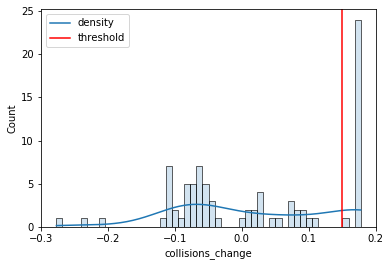

In [13]:
plt.xlim(-.3, .2)
sns.histplot(x=df['collisions_change'], bins=50, kde=True, alpha=0.2)
plt.axvline(0.15, color='red')
plt.legend(labels=['density', 'threshold'])
collisions_threshold = 0.15

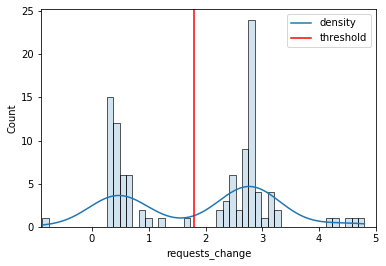

In [14]:
plt.xlim(-.9, 5)
sns.histplot(x=df['requests_change'], bins=50, kde=True, alpha=0.2)
plt.axvline(1.8, color='red')
plt.legend(labels=['density', 'threshold'])
requests_threshold = 1.8

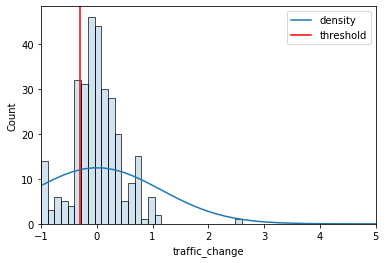

In [15]:
plt.xlim(-1, 5)
sns.histplot(x=df['traffic_change'], bins=50, kde=True, binrange=(-1, 5), alpha=0.2)
plt.axvline(-0.30, color='red')
plt.legend(labels=['density', 'threshold'])
traffic_threshold = -0.30

In [16]:
'''
TODO: where collisions_change > thresh mark as 1 else 0
TODO: where requests_change > thresh mark as 1 else 0
TODO: where traffic_change < thresh mark as 1 else 0
'''

'\nTODO: where collisions_change > thresh mark as 1 else 0\nTODO: where requests_change > thresh mark as 1 else 0\nTODO: where traffic_change < thresh mark as 1 else 0\n'

In [17]:
df['collisions_hi'] = df['collisions_change'].map(lambda val: 1 if (val >= collisions_threshold) else 0)
df['requests_hi'] = df['requests_change'].map(lambda val: 1 if (val >= requests_threshold) else 0)
df['traffic_lo'] = df['traffic_change'].map(lambda val: 1 if (val <= traffic_threshold) else 0)

In [18]:
df[['collisions_hi', 'requests_hi', 'traffic_lo']].isna().sum()

collisions_hi    0
requests_hi      0
traffic_lo       0
dtype: int64

In [19]:
df['collisions_hi'].value_counts(dropna=False)

0    289
1     25
Name: collisions_hi, dtype: int64

In [20]:
df['requests_hi'].value_counts(dropna=False)

0    252
1     62
Name: requests_hi, dtype: int64

In [21]:
df['traffic_lo'].value_counts(dropna=False)

0    251
1     63
Name: traffic_lo, dtype: int64

In [24]:
df[(df['traffic_lo'] == 1) & (df['requests_hi'] == 1)]

,Organization,Capital Program,Program Subclass,Project Status,Project Title,Project Planning From,Project Planning To,Planned Construction From,Planned Construction To,Construction Completion From,...,prior_traffic,during_traffic,start_year,prior_collisions+,requests_change,collisions_change,traffic_change,collisions_hi,requests_hi,traffic_lo
58,City Engineering,Road Rehabilitation,Mill and Pave,Project Complete,Olympus Ave Road Rehabilitation,2020-01-01,2020-12-31,2020-01-02,2020-12-31,NaN,...,17491.000000,8524.333333,2020,0,2.519544,NaN,-0.512645,0,1,1
246,Utilities Kingston,Utilties Rehabilitation,Water,Project Complete,"2020 Watermain Relining - Fleet , Wembly",NaN,NaN,2020-01-01,2020-12-30,NaN,...,13917.666667,8602.266667,2020,0,2.695271,NaN,-0.381917,0,1,1
20,City Engineering,Storm System Improvements,Drainage Improvements,Project Complete,High Gate Park Drainage Improvements,2020-01-01,2020-12-31,2020-01-02,2020-12-30,NaN,...,14411.923077,9934.363636,2020,0,2.831361,NaN,-0.310684,0,1,1
22,City Engineering,Storm System Improvements,Drainage Improvements,Project Complete,McIvor Road Storm System Improvements,NaN,NaN,2020-01-02,2020-12-30,NaN,...,14411.923077,9934.363636,2020,0,2.831361,NaN,-0.310684,0,1,1
33,Parks and Development,Parks and Development,Existing Parks,Project Complete,Shannon Park,NaN,NaN,2020-02-01,2021-09-30,NaN,...,14411.923077,9934.363636,2020,0,2.831361,NaN,-0.310684,0,1,1
37,City Engineering,Storm System Improvements,Drainage Improvements,Project Complete,Reddendale Drainage Improvements,2020-01-01,2020-12-31,2020-01-02,2021-09-29,NaN,...,14411.923077,9934.363636,2020,0,2.831361,NaN,-0.310684,0,1,1
41,Transit Services,Transit Services,Bus Pad Construction,Project Complete,Bus Pad Construction - 2021,NaN,NaN,2020-12-31,2021-12-31,NaN,...,14411.923077,9934.363636,2020,0,2.831361,NaN,-0.310684,0,1,1
42,Transit Services,Transit Services,Bus Pad Construction,Project Complete,Bus Pad Construction - 2021,NaN,NaN,2020-12-31,2021-12-31,NaN,...,14411.923077,9934.363636,2020,0,2.831361,NaN,-0.310684,0,1,1
43,City Engineering,Storm System Improvements,Drainage Improvements,Project Complete,Seabrooke Road Storm System Improvements,NaN,NaN,2020-01-02,2021-05-30,NaN,...,14411.923077,9934.363636,2020,0,2.831361,NaN,-0.310684,0,1,1
45,City Engineering,Storm System Improvements,Drainage Improvements,Project Complete,Orser Road Storm System Improvements,NaN,NaN,2020-01-02,2021-12-30,NaN,...,14411.923077,9934.363636,2020,0,2.831361,NaN,-0.310684,0,1,1


In [25]:
df[(df['traffic_lo'] == 1) & (df['collisions_hi'] == 1)]

,Organization,Capital Program,Program Subclass,Project Status,Project Title,Project Planning From,Project Planning To,Planned Construction From,Planned Construction To,Construction Completion From,...,prior_traffic,during_traffic,start_year,prior_collisions+,requests_change,collisions_change,traffic_change,collisions_hi,requests_hi,traffic_lo


In [26]:
df[(df['collisions_hi'] == 1) & (df['requests_hi'] == 1)]

,Organization,Capital Program,Program Subclass,Project Status,Project Title,Project Planning From,Project Planning To,Planned Construction From,Planned Construction To,Construction Completion From,...,prior_traffic,during_traffic,start_year,prior_collisions+,requests_change,collisions_change,traffic_change,collisions_hi,requests_hi,traffic_lo
